# NOW THE ANALYSIS:


In [1]:
!pip install statsmodels

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
cross_section_final = pd.read_excel('cross_section_final.xlsx')


In [3]:
cross_section_final_copy = cross_section_final.copy()

summary_stats1 = cross_section_final_copy[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print(summary_stats1)


       booster_price  expected_value  avg_top_5_price    set_age  \
count      33.000000       33.000000        33.000000  33.000000   
mean       10.603636        4.589401        86.482545   4.313657   
std        10.449620        2.525528        87.591944   2.443554   
min         2.800000        2.088103        10.484000   0.512329   
25%         3.610000        2.771828        33.190000   1.969863   
50%         6.420000        3.418704        58.466000   4.597260   
75%        15.490000        6.941998       104.150000   6.380822   
max        53.270000       12.365701       411.256000   8.126027   

       is_special_set  
count       33.000000  
mean         0.212121  
std          0.415149  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


In [7]:
cross_section_final_copy

,product_name,booster_price,set_name,expected_value,avg_top_5_price,release_date,set_age,is_special_set
0,Champion's Path Booster Pack,8.56,champions-path,2.987305,65.884,2020-09-25,4.482192,1
1,Crown Zenith Booster Pack,3.98,crown-zenith,4.064795,59.564,2023-01-20,2.161644,1
2,Hidden Fates Booster Pack,19.96,hidden-fates,7.267429,161.866,2019-08-23,5.575342,1
3,Shining Fates Booster Pack,4.88,shining-fates,2.439886,21.472,2021-02-19,4.079452,1
4,Shining Legends Booster Pack,30.44,shining-legends,6.988347,59.372,2017-10-06,7.454795,1
5,Sun & Moon Booster Pack,6.45,sm-base-set,3.150060,34.336,2017-02-03,8.126027,0
6,Burning Shadows Booster Pack,9.68,sm-burning-shadows,3.524877,118.276,2017-08-04,7.627397,0
7,Celestial Storm Booster Pack,18.29,sm-celestial-storm,6.941998,100.690,2018-08-03,6.630137,0
8,Cosmic Eclipse Booster Pack,19.53,sm-cosmic-eclipse,8.871870,148.622,2019-11-01,5.383562,0
9,Crimson Invasion Booster Pack,6.42,sm-crimson-invasion,3.673729,23.544,2017-11-03,7.378082,0


### Correct the set_age:

In [6]:
from datetime import datetime
today = datetime.today()
print(today)

2025-04-03 08:22:52.295049


#### use the reference_date when the data was scraped (both cards and booster prices):

In [ ]:
import pandas as pd
from datetime import datetime


# Convert 'release_date' to datetime format
cross_section_final["release_date"] = pd.to_datetime(cross_section_final["release_date"], errors="coerce")


# Set the dataset creation date (October 7, 2024)
reference_date = pd.to_datetime("07.10.2024", dayfirst=True)
print(reference_date)

# Calculate age of the set in years
cross_section_final["set_age"] = (reference_date - cross_section_final["release_date"]).dt.days / 365.25  # Convert days to years

cross_section_final

2024-10-07 00:00:00


,product_name,booster_price,set_name,expected_value,avg_top_5_price,release_date,set_age,is_special_set
0,Champion's Path Booster Pack,8.56,champions-path,2.987305,65.884,2020-09-25,4.032854,1
1,Crown Zenith Booster Pack,3.98,crown-zenith,4.064795,59.564,2023-01-20,1.713895,1
2,Hidden Fates Booster Pack,19.96,hidden-fates,7.267429,161.866,2019-08-23,5.125257,1
3,Shining Fates Booster Pack,4.88,shining-fates,2.439886,21.472,2021-02-19,3.630390,1
4,Shining Legends Booster Pack,30.44,shining-legends,6.988347,59.372,2017-10-06,7.003422,1
5,Sun & Moon Booster Pack,6.45,sm-base-set,3.150060,34.336,2017-02-03,7.674196,0
6,Burning Shadows Booster Pack,9.68,sm-burning-shadows,3.524877,118.276,2017-08-04,7.175907,0
7,Celestial Storm Booster Pack,18.29,sm-celestial-storm,6.941998,100.690,2018-08-03,6.179329,0
8,Cosmic Eclipse Booster Pack,19.53,sm-cosmic-eclipse,8.871870,148.622,2019-11-01,4.933607,0
9,Crimson Invasion Booster Pack,6.42,sm-crimson-invasion,3.673729,23.544,2017-11-03,6.926762,0


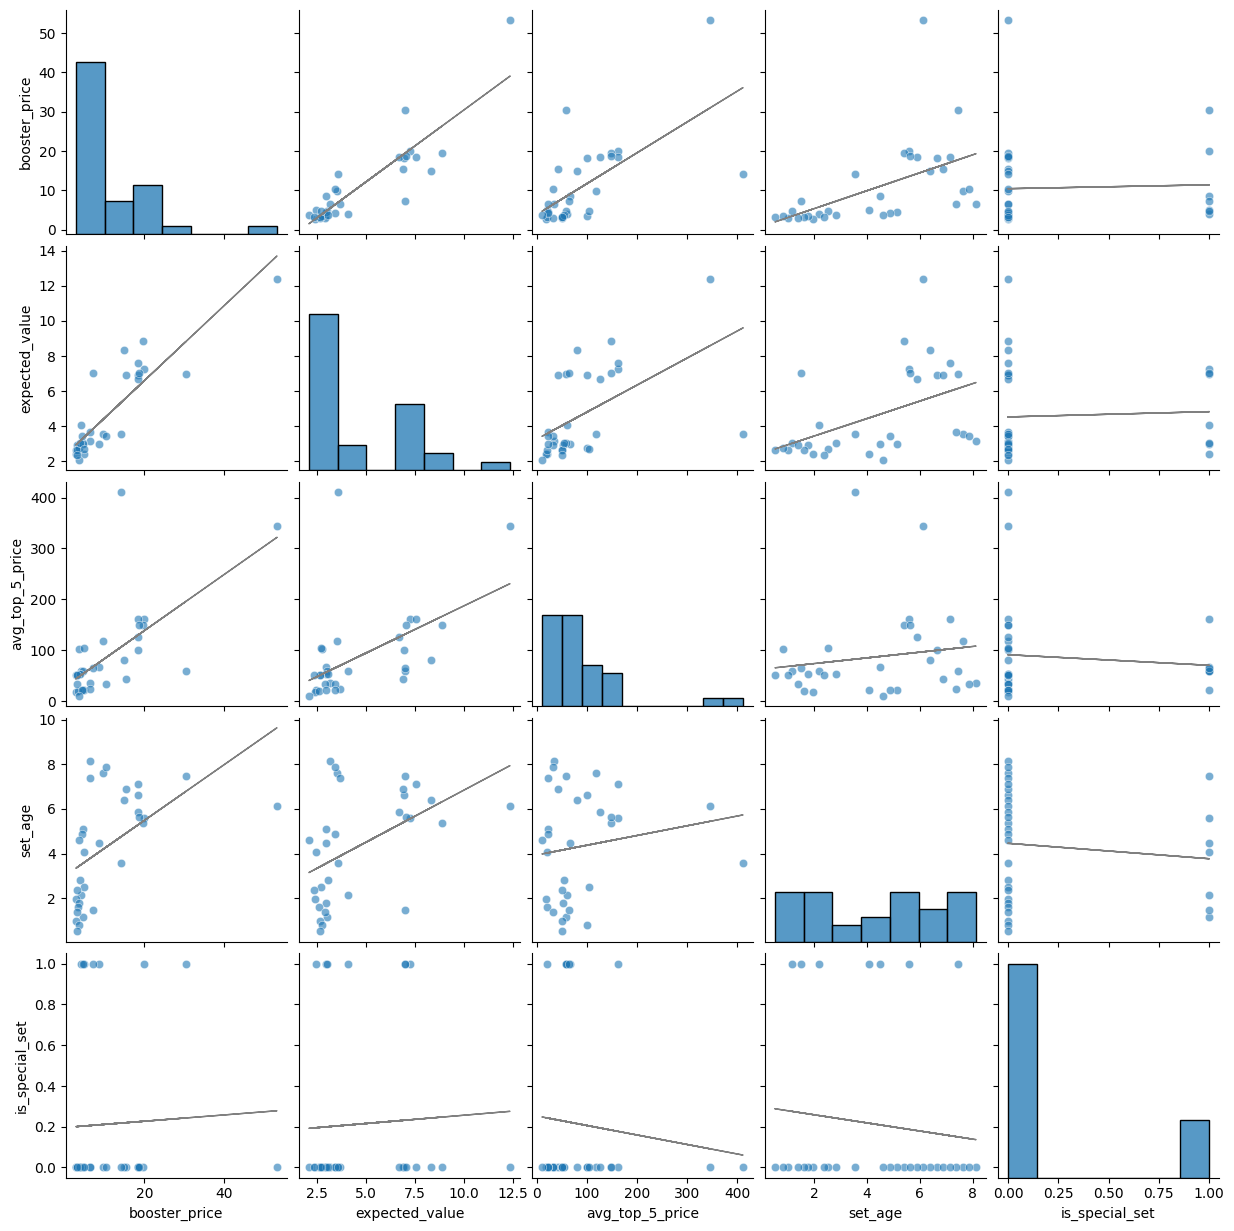

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll  # Correct import for PathCollection

# Create the pairplot (without trendlines initially)
g = sns.pairplot(
    cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]],
    plot_kws={'alpha': 0.6}  # Keeps the original look
)

# Add trendlines manually with a more subtle appearance
for ax in g.axes.flat:
    if ax is not None:
        # Extract scatter plot points
        scatter_points = [p for p in ax.collections if isinstance(p, mcoll.PathCollection)]
        if scatter_points:
            x_values, y_values = scatter_points[0].get_offsets().T  # Get X and Y data points

            if len(x_values) > 1:  # Ensure enough points for a trendline
                # Fit a simple linear regression (trendline)
                m, b = np.polyfit(x_values, y_values, 1)
                ax.plot(x_values, m * x_values + b, color='gray', linestyle='-', linewidth=1)  # Thin, solid gray line

# Show the modified pairplot
plt.show()



In [6]:
# Define independent variables
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for VIF calculation

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif_data)


          Variable       VIF
0            const  5.905493
1   expected_value  1.884129
2  avg_top_5_price  1.471519
3          set_age  1.373546
4   is_special_set  1.061218


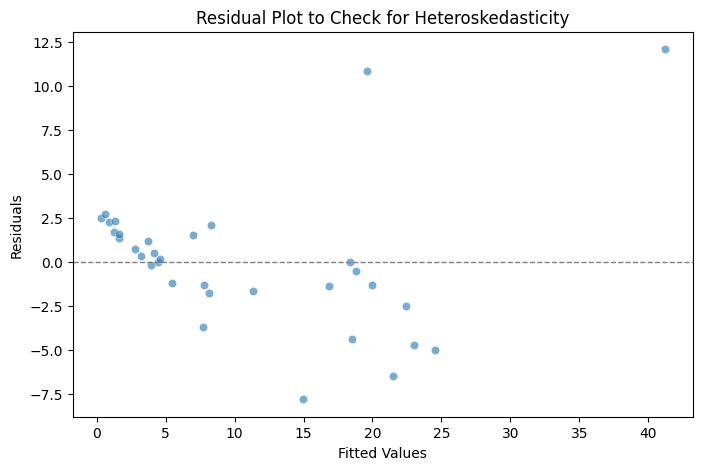

,Test,LM Statistic,p-value
0,Breusch-Pagan,16.857056,0.002061
0,White,31.748570,0.002617


In [7]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression model

# Fit OLS model
model = sm.OLS(y, X).fit()

# 1. Residual Plot (Visual Check)
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot to Check for Heteroskedasticity")
plt.show()

# 2. Breusch-Pagan Test
bp_test = sms.het_breuschpagan(residuals, X)
bp_test_results = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test[0]],
    "p-value": [bp_test[1]]
})

# 3. White's Test
white_test = sms.het_white(residuals, X)
white_test_results = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test[0]],
    "p-value": [white_test[1]]
})

# Combine results
heteroskedasticity_results = pd.concat([bp_test_results, white_test_results])

heteroskedasticity_results

## -> so there is heteroskedasticity

In [8]:
# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for the regression model

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     41.35
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.30e-11
Time:                        16:21:01   Log-Likelihood:                -91.865
No. Observations:                  33   AIC:                             193.7
Df Residuals:                      28   BIC:                             201.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2452      1.798     

In [9]:
# Run OLS regression with robust standard errors
robust_model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is more conservative but reliable

# Print the robust regression results
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8.974
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           8.54e-05
Time:                        16:21:01   Log-Likelihood:                -91.865
No. Observations:                  33   AIC:                             193.7
Df Residuals:                      28   BIC:                             201.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2452      2.859     

In [10]:
robust_model = sm.OLS(y, X).fit(cov_type='HC0')
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     18.39
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.63e-07
Time:                        16:21:01   Log-Likelihood:                -91.865
No. Observations:                  33   AIC:                             193.7
Df Residuals:                      28   BIC:                             201.2
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2452      1.851     

## very bad:

In [11]:
import statsmodels.api as sm
import numpy as np

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant

# Step 1: Run initial OLS model to get residuals
initial_model = sm.OLS(y, X).fit()
residuals = initial_model.resid

# Step 2: Estimate variance of residuals
weights = 1 / (residuals**2)  # Inverse variance as weights (avoiding division by zero)

# Step 3: Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Print WLS regression summary
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.231e+05
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           5.51e-59
Time:                        16:21:02   Log-Likelihood:                -52.264
No. Observations:                  33   AIC:                             114.5
Df Residuals:                      28   BIC:                             122.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0236      0.213    -

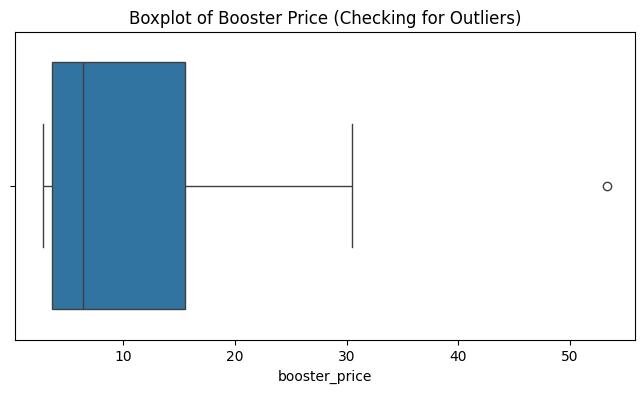

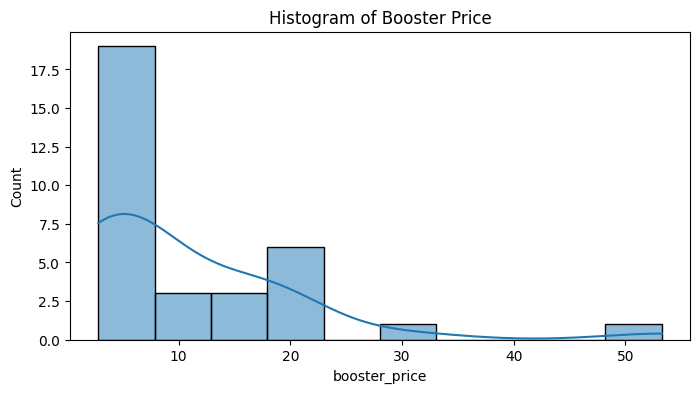


### Z-Score Outliers (booster_price) ###
    booster_price
13          53.27

### IQR Outliers (booster_price) ###
    booster_price
13          53.27

### Cook’s Distance Outliers (booster_price) ###
    booster_price
4           30.44
13          53.27
18           7.17
29          14.16


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1️Boxplot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=cross_section_final["booster_price"])
plt.title("Boxplot of Booster Price (Checking for Outliers)")
plt.show()

# 2️Histogram to check distribution
plt.figure(figsize=(8, 4))
sns.histplot(cross_section_final["booster_price"], bins=10, kde=True)
plt.title("Histogram of Booster Price")
plt.show()

# 3️Z-Score Method (Values > 3 or < -3 are Outliers)
cross_section_final["z_score"] = (cross_section_final["booster_price"] - cross_section_final["booster_price"].mean()) / cross_section_final["booster_price"].std()
z_outliers = cross_section_final[abs(cross_section_final["z_score"]) > 3]

# 4 IQR Method (Values outside 1.5 * IQR are Outliers)
Q1 = cross_section_final["booster_price"].quantile(0.25)
Q3 = cross_section_final["booster_price"].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = cross_section_final[
    (cross_section_final["booster_price"] < (Q1 - 1.5 * IQR)) | 
    (cross_section_final["booster_price"] > (Q3 + 1.5 * IQR))
]

# 5️ Cook’s Distance (Regression Influence)
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential points (Cook’s Distance > 4/n)
cooks_threshold = 4 / len(cross_section_final)
cooks_outliers = cross_section_final[cooks_d > cooks_threshold]

# Print Outlier Results
print("\n### Z-Score Outliers (booster_price) ###")
print(z_outliers[["booster_price"]])

print("\n### IQR Outliers (booster_price) ###")
print(iqr_outliers[["booster_price"]])

print("\n### Cook’s Distance Outliers (booster_price) ###")
print(cooks_outliers[["booster_price"]])


In [13]:
# Remove identified outlier
cross_section_final_wo_outlier = cross_section_final[cross_section_final["booster_price"] != 53.27]

# Define dependent and independent variables again
y = cross_section_final_wo_outlier["booster_price"]
X = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression


In [14]:
# Summary statistics after outlier removal
summary_stats_filtered = cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print("\n### Summary Statistics After Outlier Removal ###")
print(summary_stats_filtered)



### Summary Statistics After Outlier Removal ###
       booster_price  expected_value  avg_top_5_price    set_age  \
count      32.000000       32.000000        32.000000  32.000000   
mean        9.270313        4.346391        78.405625   4.256849   
std         7.222097        2.138320        75.482376   2.460414   
min         2.800000        2.088103        10.484000   0.512329   
25%         3.592500        2.759592        32.996000   1.921918   
50%         5.650000        3.284382        56.111000   4.539726   
75%        15.092500        6.927377       101.919500   6.443151   
max        30.440000        8.871870       411.256000   8.126027   

       is_special_set  
count       32.000000  
mean         0.218750  
std          0.420013  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


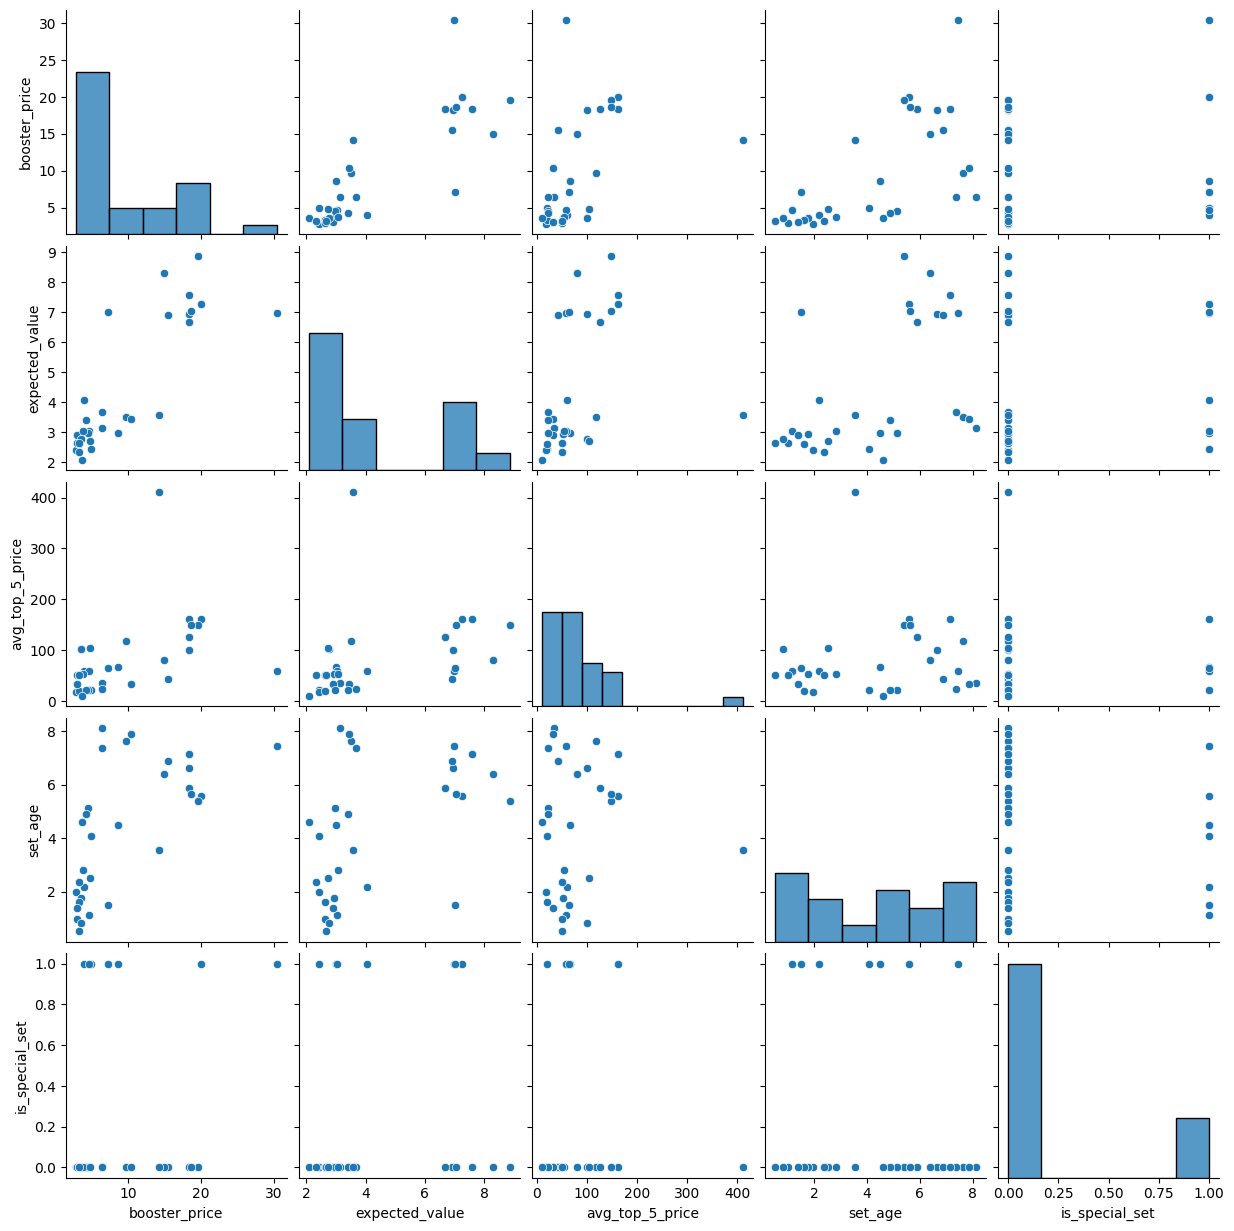

In [15]:
# Pairplot to check new relationships after outlier removal
sns.pairplot(cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
X_vif = sm.add_constant(cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Variable"] = X_vif.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print new VIF values
print("\n### Variance Inflation Factor (VIF) After Outlier Removal ###")
print(vif_data_filtered)



### Variance Inflation Factor (VIF) After Outlier Removal ###
          Variable       VIF
0            const  6.445290
1   expected_value  1.575767
2  avg_top_5_price  1.158846
3          set_age  1.388248
4   is_special_set  1.070701


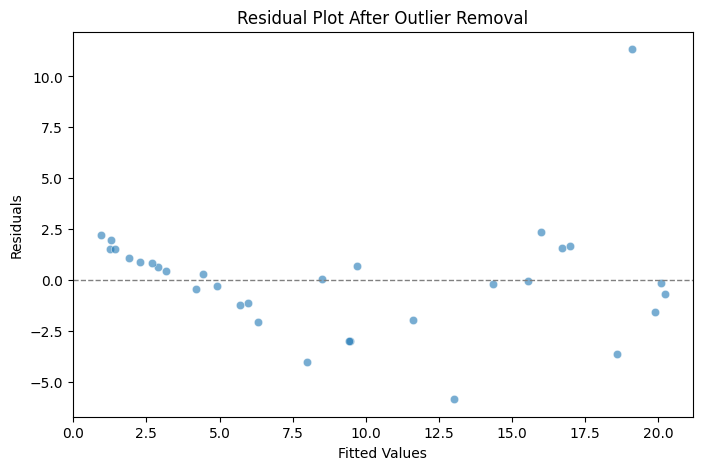


### Breusch-Pagan Test (After Outlier Removal) ###
LM Statistic: 8.876310208300527, p-value: 0.06426659914849715

### White's Test (After Outlier Removal) ###
LM Statistic: 29.526346989763585, p-value: 0.005508009519154652


In [17]:
import statsmodels.stats.api as sms

# Fit OLS model again
filtered_model = sm.OLS(y, X).fit()
residuals_filtered = filtered_model.resid
fitted_values_filtered = filtered_model.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered, y=residuals_filtered, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot After Outlier Removal")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered = sms.het_breuschpagan(residuals_filtered, X)
print("\n### Breusch-Pagan Test (After Outlier Removal) ###")
print(f"LM Statistic: {bp_test_filtered[0]}, p-value: {bp_test_filtered[1]}")

# White's Test
white_test_filtered = sms.het_white(residuals_filtered, X)
print("\n### White's Test (After Outlier Removal) ###")
print(f"LM Statistic: {white_test_filtered[0]}, p-value: {white_test_filtered[1]}")


In [18]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())



### Final Regression Results After Outlier Removal (HC3 Robust) ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     78.02
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.96e-14
Time:                        16:21:04   Log-Likelihood:                -78.461
No. Observations:                  32   AIC:                             166.9
Df Residuals:                      27   BIC:                             174.3
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [19]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC0')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())



### Final Regression Results After Outlier Removal (HC3 Robust) ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     125.8
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.84e-17
Time:                        16:21:04   Log-Likelihood:                -78.461
No. Observations:                  32   AIC:                             166.9
Df Residuals:                      27   BIC:                             174.3
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [20]:
# Run OLS regression
model_wo_hc = sm.OLS(y, X).fit()

# Print the regression results
print(model_wo_hc.summary())

                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     36.46
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.61e-10
Time:                        16:21:04   Log-Likelihood:                -78.461
No. Observations:                  32   AIC:                             166.9
Df Residuals:                      27   BIC:                             174.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.8601      1.373     

In [21]:
# Remove is_special_set and re-run the regression
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Run the final model
final_model_no_special = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# Print results
print("\n### Final Regression Without is_special_set ###")
print(final_model_no_special.summary())



### Final Regression Without is_special_set ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.79e-16
Time:                        16:21:04   Log-Likelihood:                -80.251
No. Observations:                  32   AIC:                             168.5
Df Residuals:                      28   BIC:                             174.4
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

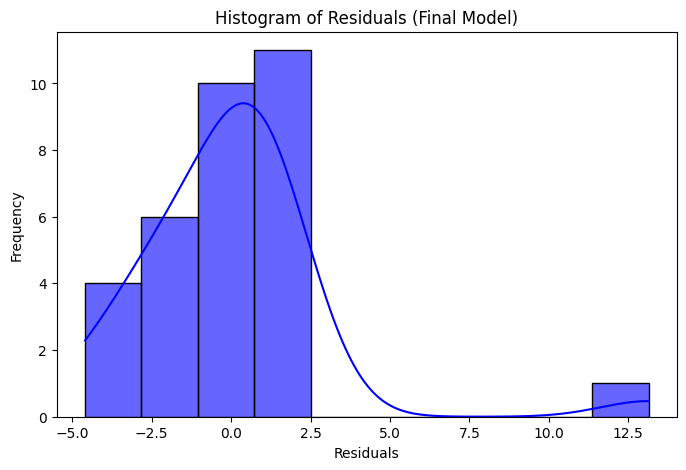

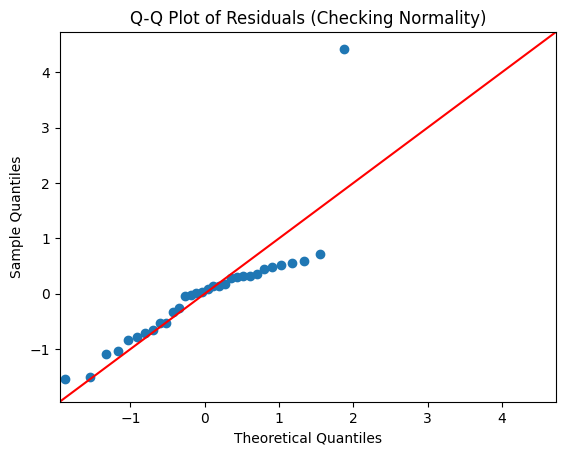


### Shapiro-Wilk Test for Normality ###
Statistic: 0.7530485423681719, p-value: 5.997543928172345e-06

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.2163623451615284, p-value: 0.08548798858582318

### Jarque-Bera Test for Normality ###
Statistic: 149.7819155104036, p-value: 2.9872412827810234e-33


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Load your cleaned dataset (filtered_df) before running this code
# Define dependent and independent variables
y = cross_section_final_wo_outlier["booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the final regression model
final_model = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model.resid, 'norm', args=(final_model.resid.mean(), final_model.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


In [23]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.88e-17
Time:                        16:21:04   Log-Likelihood:                 6.0718
No. Observations:                  32   AIC:                            -4.144
Df Residuals:                      28   BIC:                             1.719
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\janhr\AppData\Local\Temp\ipykernel_6880\2655366185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


In [24]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           9.34e-17
Time:                        16:21:04   Log-Likelihood:                 11.346
No. Observations:                  32   AIC:                            -12.69
Df Residuals:                      27   BIC:                            -5.363
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\janhr\AppData\Local\Temp\ipykernel_6880\1541417680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


In [25]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())



### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:          booster_price   Pseudo R-squared:               0.6871
Model:                       QuantReg   Bandwidth:                       2.682
Method:                 Least Squares   Sparsity:                        5.677
Date:                Tue, 01 Apr 2025   No. Observations:                   32
Time:                        16:21:04   Df Residuals:                       28
                                        Df Model:                            3
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0186      1.247     -3.221      0.003      -6.574      -1.463
expected_value      1.8146      0.291      6.231      0.000       1.218       2.411
avg_top_5_price     0.0217      0.007      3.003      0.006      

In [26]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())


### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:          booster_price   Pseudo R-squared:               0.7031
Model:                       QuantReg   Bandwidth:                       2.405
Method:                 Least Squares   Sparsity:                        5.080
Date:                Tue, 01 Apr 2025   No. Observations:                   32
Time:                        16:21:04   Df Residuals:                       27
                                        Df Model:                            4
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.1259      1.140     -3.620      0.001      -6.465      -1.787
expected_value      1.8505      0.268      6.910      0.000       1.301       2.400
avg_top_5_price     0.0220      0.007      3.388      0.002      

In [27]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

# Recreate the log-transformed dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define the new dependent variable
y_log = cross_section_final_wo_outlier["log_booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the log-transformed model again
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print the model summary
print("\n### Log-Transformed Model Summary ###")
print(final_model_log.summary())



### Log-Transformed Model Summary ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           9.34e-17
Time:                        16:21:04   Log-Likelihood:                 11.346
No. Observations:                  32   AIC:                            -12.69
Df Residuals:                      27   BIC:                            -5.363
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
con

C:\Users\janhr\AppData\Local\Temp\ipykernel_6880\3254096150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


## the above is for the following:

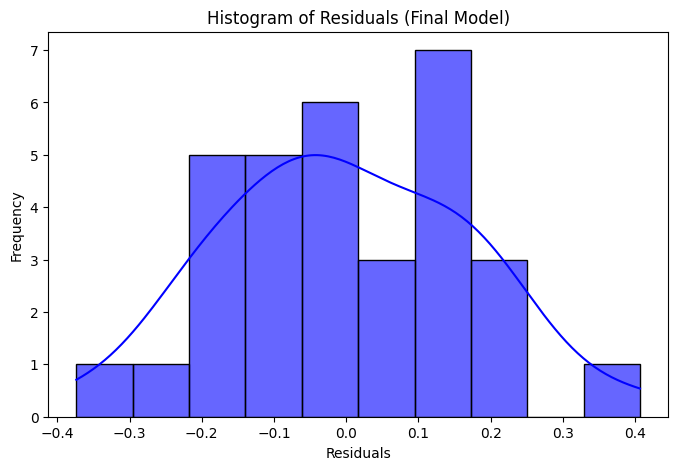

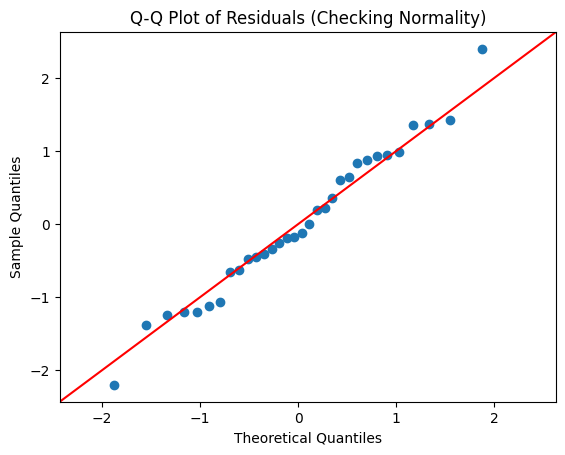


### Shapiro-Wilk Test for Normality ###
Statistic: 0.9834211704454925, p-value: 0.890594866240537

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.08053797143487906, p-value: 0.9748462834351292

### Jarque-Bera Test for Normality ###
Statistic: 0.23552788403442743, p-value: 0.8889058611746261


In [28]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log.resid, 'norm', args=(final_model_log.resid.mean(), final_model_log.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


## the errors are normal now..

In [29]:
# Set seed for reproducibility
np.random.seed(42)

import numpy as np
import statsmodels.api as sm

cross_section_final_wo_outlier2 = cross_section_final_wo_outlier.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X_filtered.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_wo_outlier2.sample(n=len(cross_section_final_wo_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Create a DataFrame with the bootstrap results
bootstrap_results = pd.DataFrame({
    "Variable": X_filtered.columns,
    "Original Coefficient": final_model_log.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": np.std(bootstrap_coefs, axis=0),
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds
})

bootstrap_results

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper
0,const,0.298562,0.298054,0.067208,0.155935,0.419340
1,expected_value,0.172684,0.171991,0.022136,0.126027,0.216029
2,avg_top_5_price,0.003068,0.003270,0.000680,0.002255,0.005206
3,set_age,0.141646,0.139814,0.017748,0.107241,0.176420
4,is_special_set,0.265472,0.257639,0.112586,0.031793,0.464264


In [30]:
# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Add p-values to the bootstrap results table
bootstrap_results["Bootstrapped p-value"] = p_values

bootstrap_results

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,0.298562,0.298054,0.067208,0.155935,0.419340,0.000
1,expected_value,0.172684,0.171991,0.022136,0.126027,0.216029,0.000
2,avg_top_5_price,0.003068,0.003270,0.000680,0.002255,0.005206,0.000
3,set_age,0.141646,0.139814,0.017748,0.107241,0.176420,0.000
4,is_special_set,0.265472,0.257639,0.112586,0.031793,0.464264,0.032


## With the outlier:

In [45]:

# Define dependent and independent variables again
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression



#  Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log2 = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log2.summary())



### Regression with Log-Transformed Booster Price (With Outlier) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     85.31
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.90e-15
Time:                        17:29:48   Log-Likelihood:                 10.742
No. Observations:                  33   AIC:                            -11.48
Df Residuals:                      28   BIC:                            -4.002
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [46]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier.sample(n=len(cross_section_final_with_outlier), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results2 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results2

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,0.342418,0.337294,0.068231,0.196706,0.456049,0.000
1,expected_value,0.159977,0.165080,0.020754,0.130996,0.210215,0.000
2,avg_top_5_price,0.002848,0.002859,0.000616,0.001472,0.004195,0.004
3,set_age,0.145875,0.142510,0.016509,0.113089,0.176406,0.000
4,is_special_set,0.282451,0.270301,0.108245,0.028453,0.473451,0.030


## -> its 95% confidence interval!

### now individual R2 - loop through the variables and see the drop of R2 (i.e., just one variable dropped at a time and drop of R2 caused by this is the contribution of this variable to the overall R2):

In [47]:
# Full model R²
r2_full = final_model_log2.rsquared

# Store partial R² values
partial_r2s = {}

for var in ["expected_value", "avg_top_5_price", "set_age", "is_special_set"]:
    X_reduced = X.drop(columns=[var])
    model_reduced = sm.OLS(y_log, X_reduced).fit()
    r2_reduced = model_reduced.rsquared

    # Partial R² formula
    partial_r2 = r2_full - r2_reduced
    partial_r2s[var] = partial_r2

# Print partial R² for each predictor
print("\n### Partial R² for Each Predictor ###")
for var, r2 in partial_r2s.items():
    print(f"{var}: {r2:.4f}")



### Partial R² for Each Predictor ###
expected_value: 0.1310
avg_top_5_price: 0.0640
set_age: 0.1399
is_special_set: 0.0196


### Check for non-linear relationships:

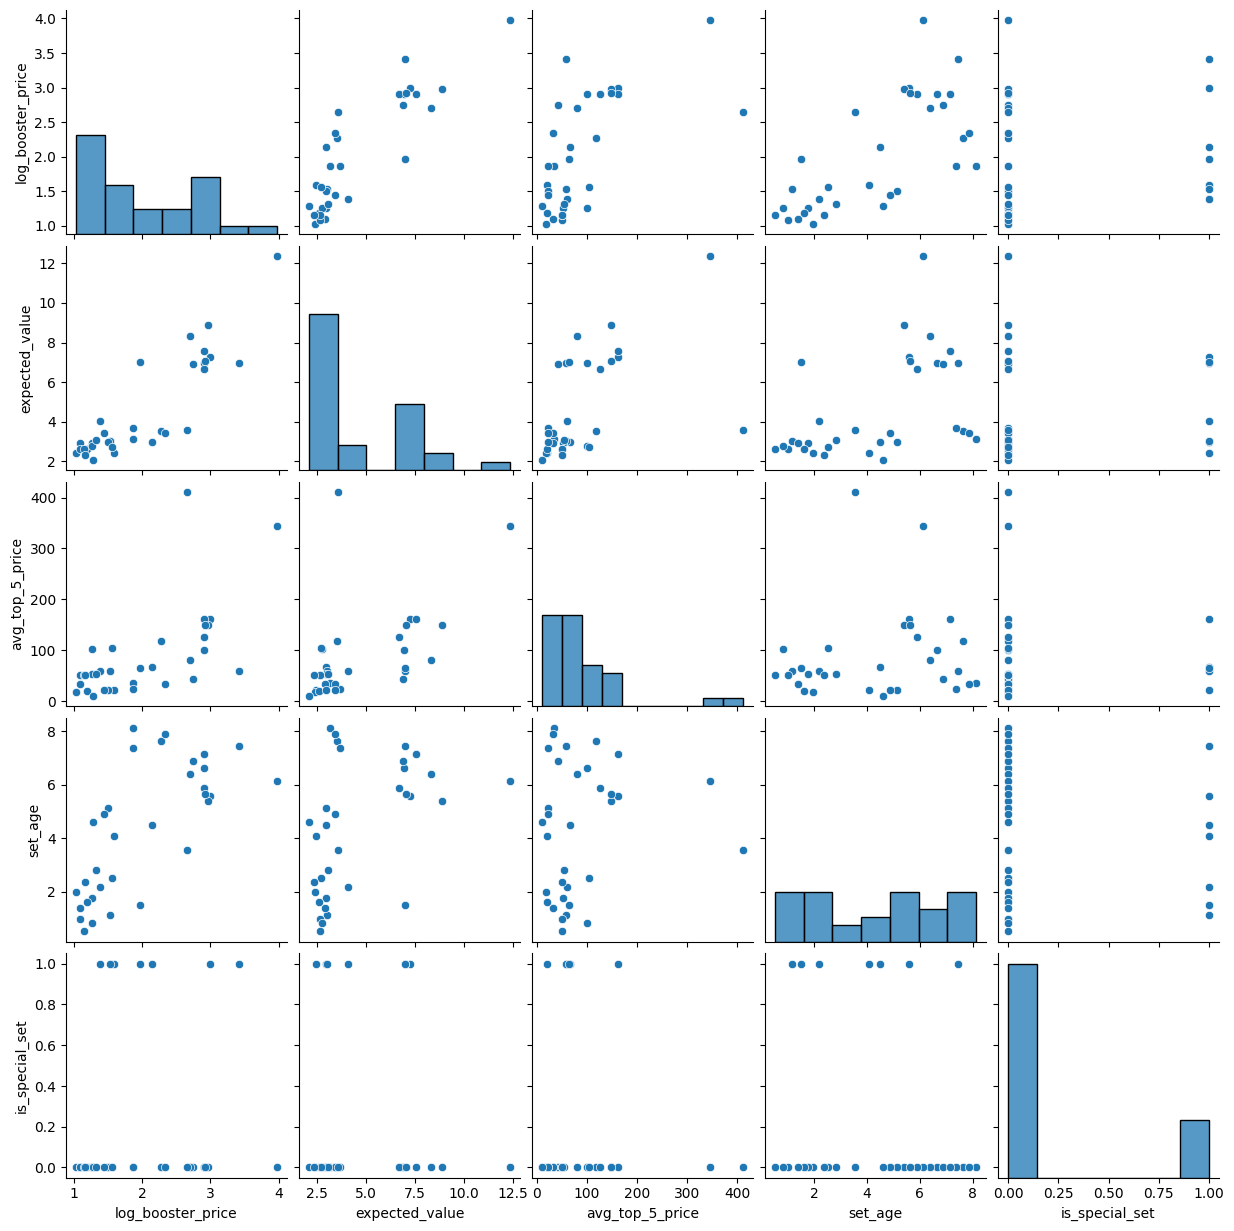

In [49]:
# Pairplot to check new relationships after taking the log of the booster_price:
sns.pairplot(cross_section_final[["log_booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


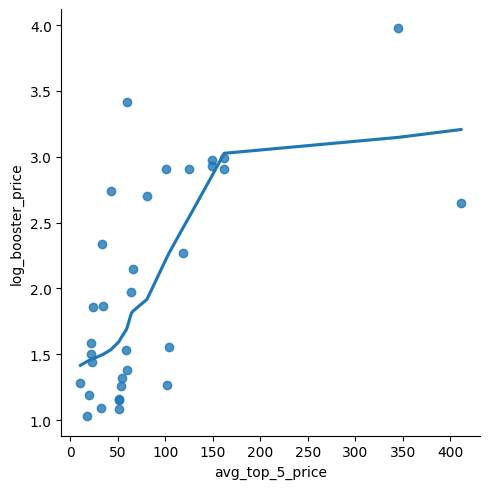

In [50]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="avg_top_5_price", y="log_booster_price", lowess=True)


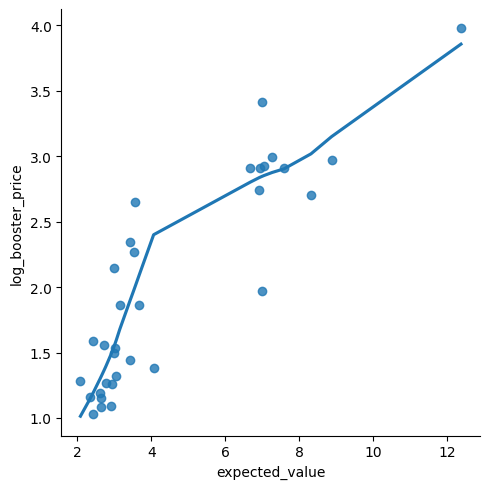

In [51]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="expected_value", y="log_booster_price", lowess=True)


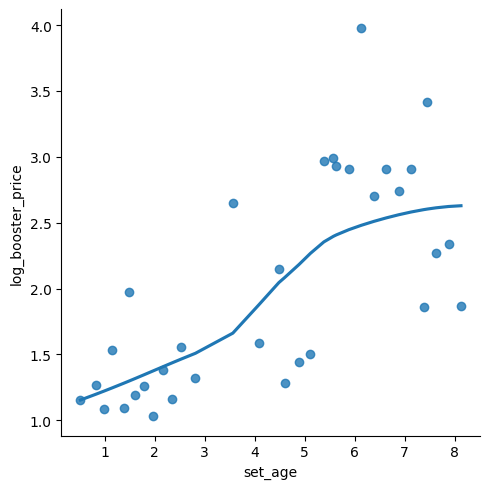

In [52]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="set_age", y="log_booster_price", lowess=True)


In [ ]:
cross_section_final['log_avg_top_5_price'] = np.log(cross_section_final['avg_top_5_price'])

model_log_log = smf.ols('log_booster_price ~ expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final ).fit()

print(model_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.37e-17
Time:                        18:56:13   Log-Likelihood:                 9.4073
No. Observations:                  33   AIC:                            -8.815
Df Residuals:                      28   BIC:                            -1.332
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.6101    

## model log log log:

In [57]:
# Add log of expected_value
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Refit with both logs
model_loglog = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit()

# Show summary
print(model_loglog.summary())


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.75e-16
Time:                        19:03:18   Log-Likelihood:                 5.8554
No. Observations:                  33   AIC:                            -1.711
Df Residuals:                      28   BIC:                             5.772
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.9557    

### model log log log log:

In [58]:
# Apply log-transform to all relevant vars
cross_section_final['log_set_age'] = np.log(cross_section_final['set_age'])
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Fit the full log-log model
final_loglog_model = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + log_set_age + is_special_set', data=cross_section_final).fit()

print(final_loglog_model.summary())


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     86.61
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.39e-15
Time:                        19:10:22   Log-Likelihood:                 3.2980
No. Observations:                  33   AIC:                             3.404
Df Residuals:                      28   BIC:                             10.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.8753    

### wo heteroskedasticity robust errors hc3:

In [33]:
# Fit OLS again with log-transformed y
final_model_log3 = sm.OLS(y_log, X).fit()

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log3.summary())



### Regression with Log-Transformed Booster Price (With Outlier) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.43e-18
Time:                        16:21:07   Log-Likelihood:                 10.742
No. Observations:                  33   AIC:                            -11.48
Df Residuals:                      28   BIC:                            -4.002
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

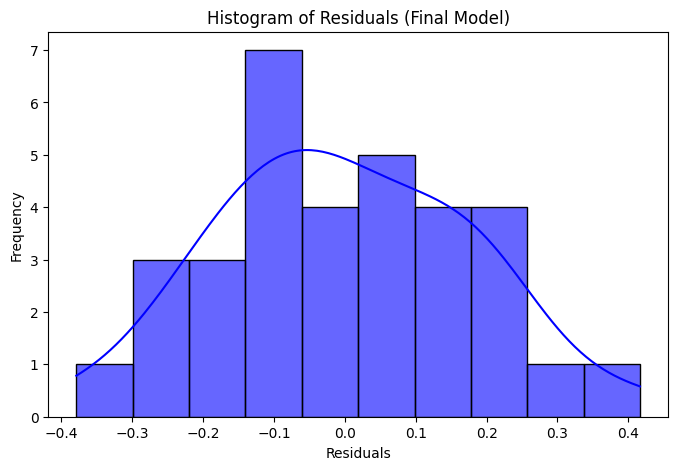

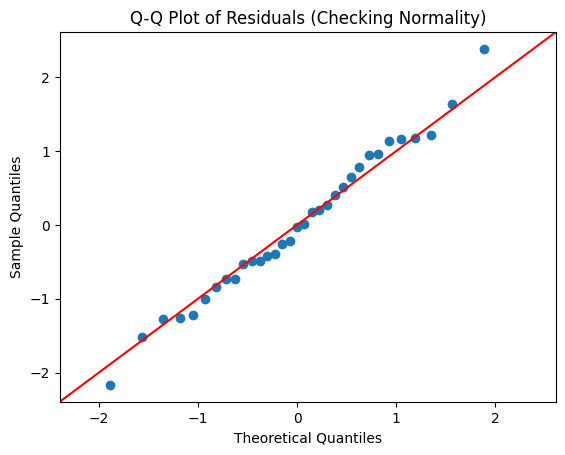


### Shapiro-Wilk Test for Normality ###
Statistic: 0.989042704715467, p-value: 0.9795830384704723

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.07359964228580534, p-value: 0.9881843797819289

### Jarque-Bera Test for Normality ###
Statistic: 0.3011891980753785, p-value: 0.8601963524111909


In [34]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log2.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log2.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log2.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log2.resid, 'norm', args=(final_model_log2.resid.mean(), final_model_log2.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log2.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


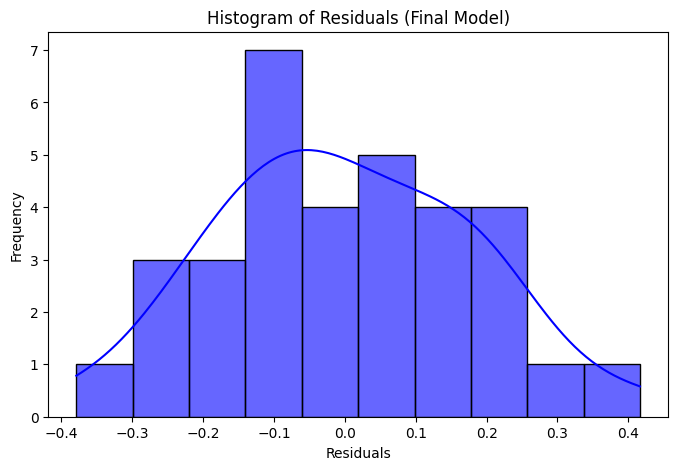

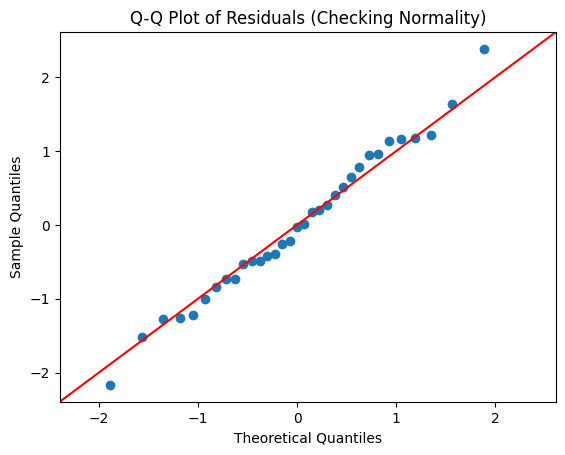


### Shapiro-Wilk Test for Normality ###
Statistic: 0.989042704715467, p-value: 0.9795830384704723

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.07359964228580534, p-value: 0.9881843797819289

### Jarque-Bera Test for Normality ###
Statistic: 0.3011891980753785, p-value: 0.8601963524111909


In [35]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log3.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log3.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log3.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log3.resid, 'norm', args=(final_model_log3.resid.mean(), final_model_log3.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log3.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


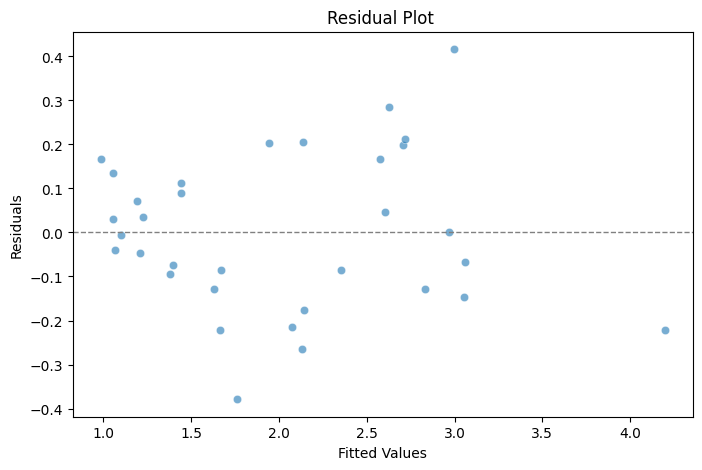


### Breusch-Pagan Test #
LM Statistic: 10.34928558424173, p-value: 0.03493759675454235

### White's Test #
LM Statistic: 21.432939006221538, p-value: 0.06479523362857839


In [36]:
residuals_filtered2 = final_model_log3.resid
fitted_values_filtered2 = final_model_log3.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered2, y=residuals_filtered2, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot ")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered2 = sms.het_breuschpagan(residuals_filtered2, X)
print("\n### Breusch-Pagan Test #")
print(f"LM Statistic: {bp_test_filtered2[0]}, p-value: {bp_test_filtered2[1]}")

# White's Test
white_test_filtered2 = sms.het_white(residuals_filtered2, X)
print("\n### White's Test #")
print(f"LM Statistic: {white_test_filtered2[0]}, p-value: {white_test_filtered2[1]}")


# ...SO... we use hc3 

## Now, the quantile regression with log booster prices and with outlier:

In [37]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model2 = smf.quantreg('log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model2.summary())


### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:      log_booster_price   Pseudo R-squared:               0.8085
Model:                       QuantReg   Bandwidth:                      0.2002
Method:                 Least Squares   Sparsity:                       0.4262
Date:                Tue, 01 Apr 2025   No. Observations:                   33
Time:                        16:21:07   Df Residuals:                       28
                                        Df Model:                            4
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3738      0.090      4.146      0.000       0.189       0.558
expected_value      0.1659      0.020      8.104      0.000       0.124       0.208
avg_top_5_price     0.0031      0.001      5.935      0.000      

## now plot across quantiles:

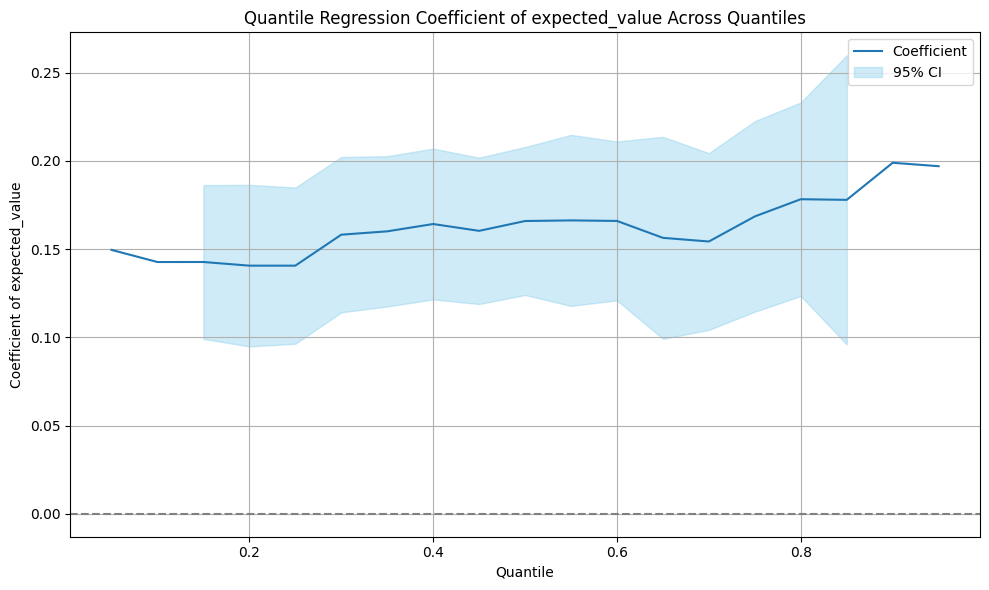

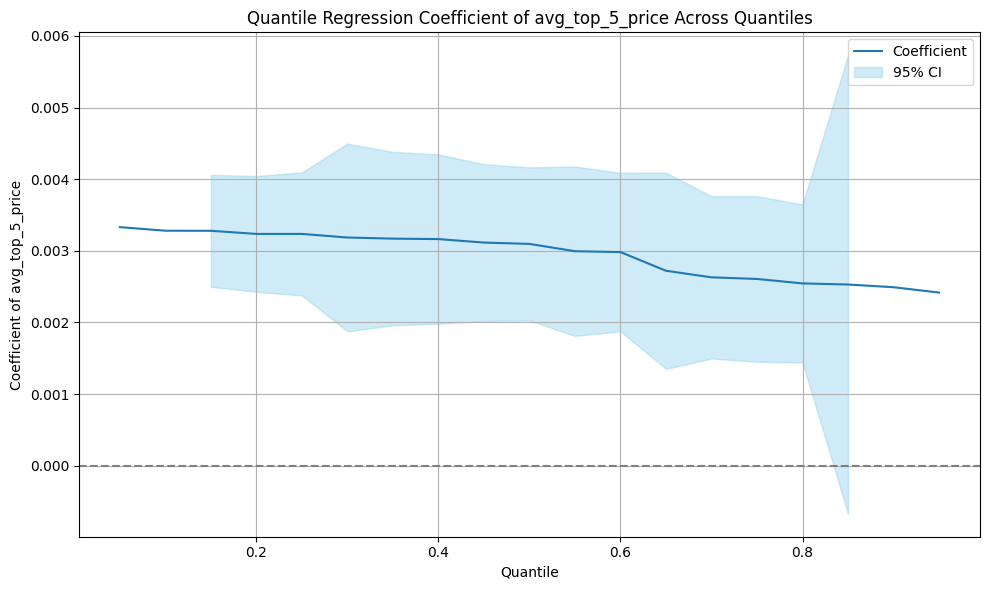

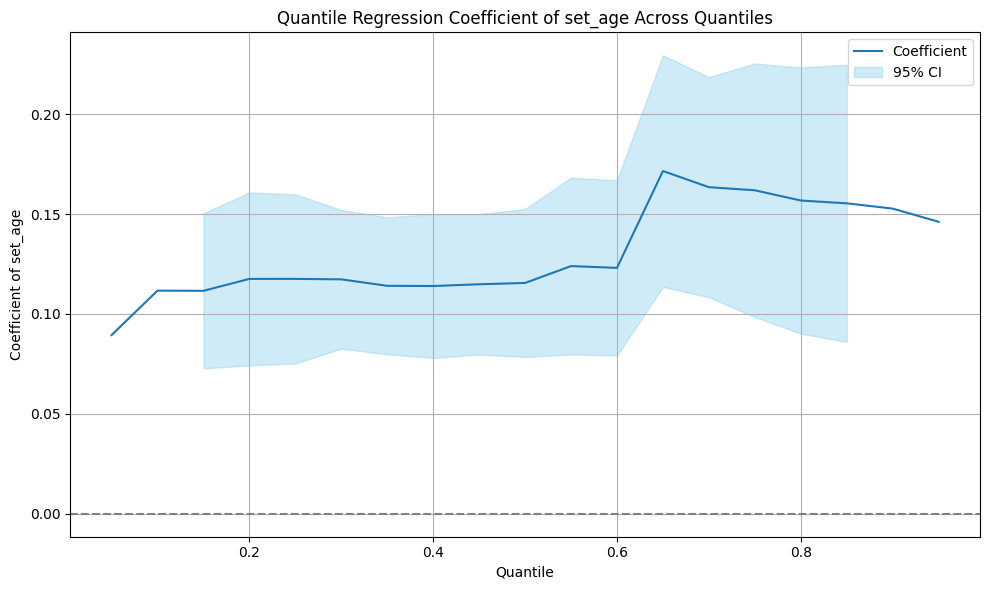

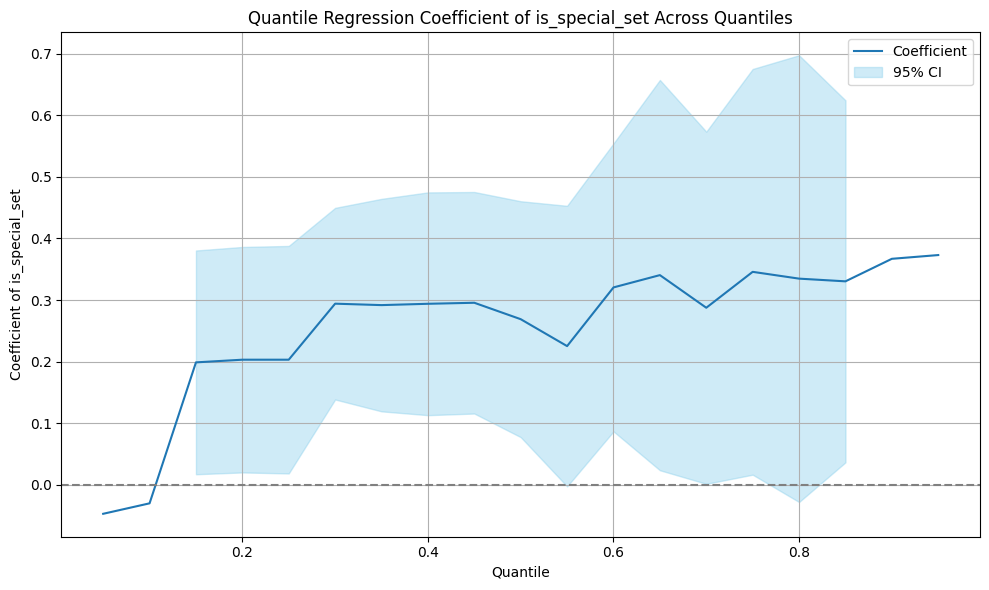

In [41]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define the model formula and variables of interest
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']

# Define quantiles
quantiles = np.arange(0.05, 0.96, 0.05)

# Loop through each variable and plot its coefficients across quantiles
for var in variables:
    coefs = []
    ci_lower = []
    ci_upper = []
    
    for q in quantiles:
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coefs.append(res.params[var])
        
        # Confidence intervals
        conf_int = res.conf_int()
        ci_lower.append(conf_int.loc[var, 0])
        ci_upper.append(conf_int.loc[var, 1])

    # Plot for current variable
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coefs, label='Coefficient')
    plt.fill_between(quantiles, ci_lower, ci_upper, color='skyblue', alpha=0.4, label='95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression Coefficient of {var} Across Quantiles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Bootstrapping for variable: expected_value


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
  5%|▌         | 1/19 [00:06<01:59,  6.64s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnin

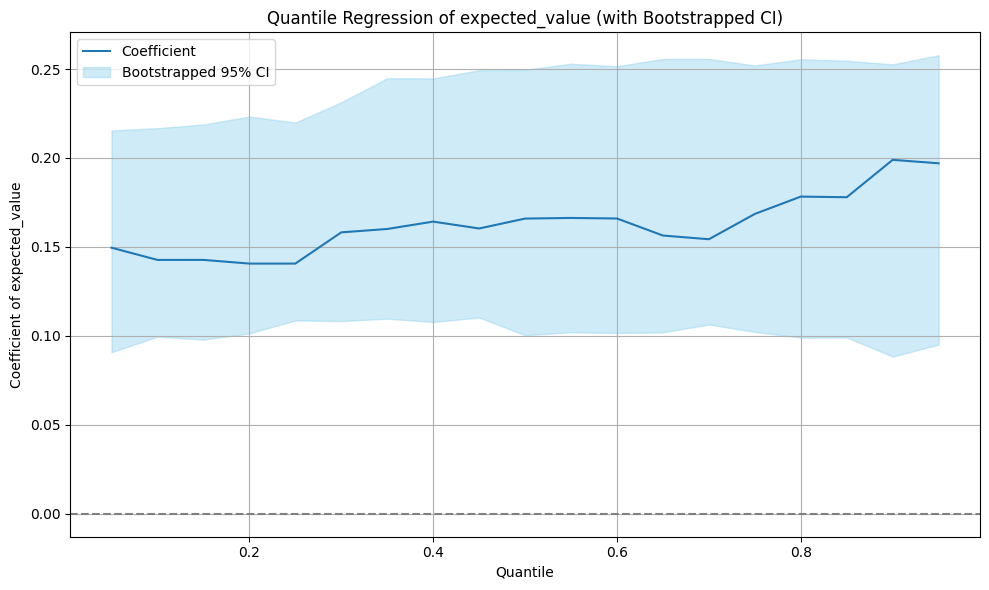


Bootstrapping for variable: avg_top_5_price


  5%|▌         | 1/19 [00:06<01:49,  6.06s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations 

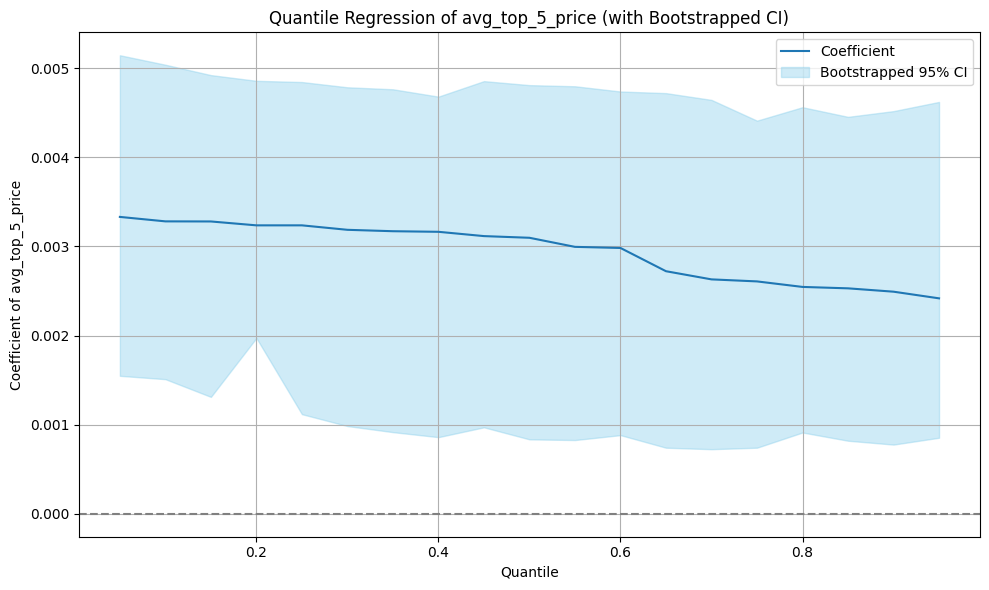


Bootstrapping for variable: set_age


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str

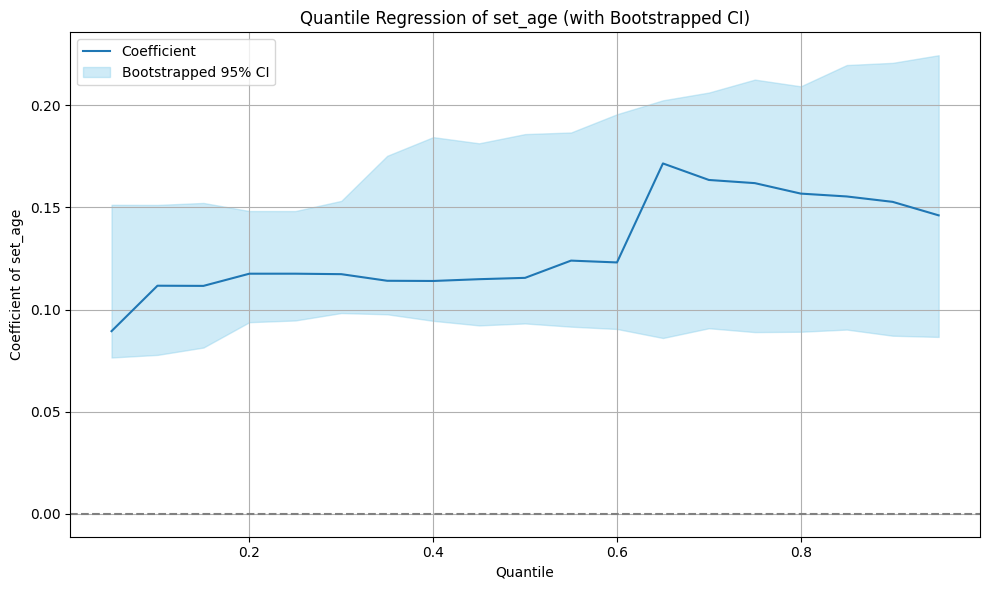


Bootstrapping for variable: is_special_set


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str

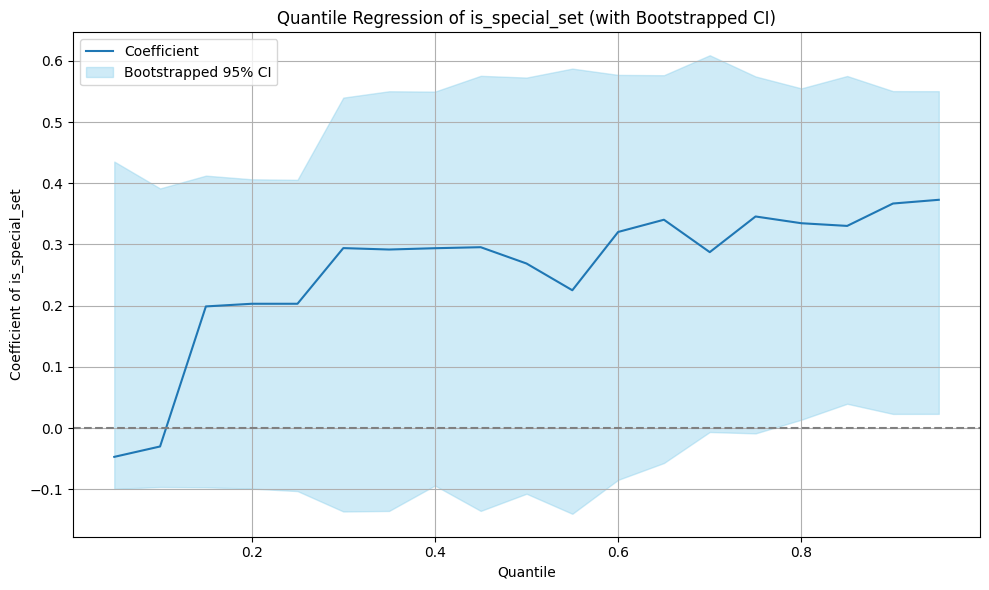

In [43]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm import tqdm

# Settings
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']
quantiles = np.arange(0.05, 0.96, 0.05)
n_bootstraps = 1000  # You can reduce to 500 if it's slow
random_seed = 42

# Set seed for reproducibility
np.random.seed(random_seed)

for var in variables:
    coef_values = []
    lower_bounds = []
    upper_bounds = []

    print(f"\nBootstrapping for variable: {var}")
    for q in tqdm(quantiles):
        # Fit model on full data for this quantile
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coef_values.append(res.params[var])

        # Bootstrap loop
        boot_coefs = []
        for _ in range(n_bootstraps):
            boot_sample = cross_section_final.sample(frac=1, replace=True)
            try:
                boot_model = smf.quantreg(formula, data=boot_sample)
                boot_res = boot_model.fit(q=q, max_iter=1000, disp=False)
                boot_coefs.append(boot_res.params[var])
            except:
                continue  # In case of convergence issues

        # Compute 95% CI
        lower = np.percentile(boot_coefs, 2.5)
        upper = np.percentile(boot_coefs, 97.5)
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coef_values, label='Coefficient')
    plt.fill_between(quantiles, lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Bootstrapped 95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression of {var} (with Bootstrapped CI)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [38]:
# now just bootstrap without log returns - lets see:

In [39]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = bootstrap_sample["booster_price"]
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results3 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results3

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,0.342418,-7.462695,1.904638,-11.154575,-4.060331,2.000
1,expected_value,0.159977,2.319112,0.686884,1.076313,3.577850,0.000
2,avg_top_5_price,0.002848,0.040062,0.023340,0.007958,0.099573,0.028
3,set_age,0.145875,0.826283,0.376750,0.096896,1.557993,0.022
4,is_special_set,0.282451,1.690277,2.324431,-2.899329,6.387792,0.470


## the final comparison of the base ols (with outlier, no log transform) and bootstrapping (the same).

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Use the full dataset (with outlier)
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define independent variables
X = cross_section_final_with_outlier2[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

# Define dependent variable (no log-transform)
y = cross_section_final_with_outlier2["booster_price"]

# Fit the original linear model (for reference)
final_model_linear = sm.OLS(y, X).fit()

# Number of bootstrap samples
num_bootstraps = 1000

# Storage for bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Bootstrapping loop
for i in range(num_bootstraps):
    # Resample dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define X and y for the bootstrap sample
    X_boot = sm.add_constant(bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
    y_boot = bootstrap_sample["booster_price"]

    # Fit the model and store coefficients
    boot_model = sm.OLS(y_boot, X_boot).fit()
    bootstrap_coefs[i, :] = boot_model.params.values

# Compute bootstrap statistics
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Two-tailed bootstrapped p-values (clipped at 1)
p_values = 2 * np.minimum(
    np.mean(bootstrap_coefs <= 0, axis=0),
    np.mean(bootstrap_coefs > 0, axis=0)
)

# Combine results into a DataFrame
bootstrap_results_linear = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_linear.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

# Display the results
bootstrap_results_linear


,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,-8.245180,-7.462695,1.904638,-11.154575,-4.060331,0.000
1,expected_value,2.604191,2.319112,0.686884,1.076313,3.577850,0.000
2,avg_top_5_price,0.035492,0.040062,0.023340,0.007958,0.099573,0.028
3,set_age,0.813797,0.826283,0.376750,0.096896,1.557993,0.022
4,is_special_set,1.495835,1.690277,2.324431,-2.899329,6.387792,0.470
